In [1]:
import numpy as np

In [2]:
class environment:
    
    def __init__(self, grid_height, grid_width):

        self.height = grid_height
        self.width = grid_width
        self.start = []
        self.end = []
        self.reward = []
        self.map = np.array([i for i in range(grid_height * grid_width)])
        self.action_space = [0, 1, 2, 3]

    def get_Map(self):
        print(self.map.reshape([self.width, self.height]))

    def get_NumState(self):
        return self.height * self.width

    def map_Designate(self, start_cell, end_cell, reward):
        self.start.append(start_cell)
        self.end.append(end_cell)
        self.reward.append(reward)

    def get_Observation(self, location, action):
        if action == -1:
            return None, self.action_space, None

        new_location = 0

        if location in self.start:
            idx = self.start.index(location)
            new_location = self.end[idx]
            reward = self.reward[idx]
            return new_location, self.action_space, reward

        reward = 0

        if action == 0: #UP
            if location - self.width < 0:
                new_location = location
            else:
                new_location = location - self.width

        elif action == 1: #DOWN
            if location + self.width > len(self.map) - 1:
                new_location = location
            else:
                new_location = location + self.width

        elif action == 2: #LEFT
            if location % self.width == 0:
                new_location = location
            else:
                new_location = location - 1

        elif action == 3: #RIGHT
            if (location + 1) % self.width == 0:
                new_location = location
            else:
                new_location = location + 1

        return new_location, self.action_space, reward

In [3]:
Envir = environment(8, 8)
Envir.get_Map()
Envir.map_Designate(17, 56, -15)
Envir.map_Designate(18, 56, -15)
Envir.map_Designate(19, 56, -15)
Envir.map_Designate(21, 56, -15)
Envir.map_Designate(25, 56, -15)
Envir.map_Designate(33, 56, -15)
Envir.map_Designate(41, 56, -15)
Envir.map_Designate(42, 56, -15)
Envir.map_Designate(43, 56, -15)
Envir.map_Designate(46, 56, -15)
Envir.map_Designate(47, 56, -15)
Envir.map_Designate(47, 56, -15)
Envir.map_Designate(15, 56, +15)
Envir.map_Designate(1, 10, +5)
Envir.map_Designate(26, 56, +20)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]


In [5]:
for i in range(len(Envir.start)):
    print('i = ' + str(i) + ' [start at ' + str(Envir.start[i]) + ' results at '
          + str(Envir.end[i]) + ' get Reward: ' + str(Envir.reward[i]))

i = 0 [start at 17 results at 56 get Reward: -15
i = 1 [start at 18 results at 56 get Reward: -15
i = 2 [start at 19 results at 56 get Reward: -15
i = 3 [start at 21 results at 56 get Reward: -15
i = 4 [start at 25 results at 56 get Reward: -15
i = 5 [start at 33 results at 56 get Reward: -15
i = 6 [start at 41 results at 56 get Reward: -15
i = 7 [start at 42 results at 56 get Reward: -15
i = 8 [start at 43 results at 56 get Reward: -15
i = 9 [start at 46 results at 56 get Reward: -15
i = 10 [start at 47 results at 56 get Reward: -15
i = 11 [start at 47 results at 56 get Reward: -15
i = 12 [start at 15 results at 56 get Reward: 15
i = 13 [start at 1 results at 10 get Reward: 5
i = 14 [start at 26 results at 56 get Reward: 20


In [6]:
a, b, r = Envir.get_Observation(1, 0)
print(r)

5


In [7]:
toss = np.random.rand()
toss

0.7537147110445056

In [44]:
class MAB_agent:
    def __init__(self, envir, init_location):
        self.reward_trace = []
        self.location_now = init_location
        self.lastAction = None
        self.lastState = None
        self.value_table = {}

    def get_TotalReward(self):
        return np.sum(self.reward_trace)

    def getAction(self, observation):
        self.location_now, action_space, pre_reward = observation

        if self.location_now not in self.value_table.keys():
            self.value_table[self.location_now] = {i : [0, 1] for i in action_space}

        if pre_reward is None:
            action = np.random.choice(action_space, p = [1 / (len(action_space)) for action in action_space])
        else:
            self.reward_trace.append(pre_reward)

            value = self.value_table[self.lastState][self.lastAction][0]
            count = self.value_table[self.lastState][self.lastAction][1]

            count += 1
            value += (1 / count) * (pre_reward - value)

            self.value_table[self.lastState][self.lastAction][0] = value
            self.value_table[self.lastState][self.lastAction][1] = count

            state_dict = self.value_table[self.lastState].values()
            state_dict_array = np.array(list(state_dict))
            value_column = state_dict_array[:, 0]
            action = np.argmax(value_column)

        self.lastState = self.location_now
        self.lastAction = action

        assert action in action_space, "INVALID action taken"
        return action

In [45]:
class MABe_agent(MAB_agent):
    def __init__(self, envir, init_location, epsilon):
        
        super(MABe_agent, self).__init__(envir, init_location)
        self.epsilon = epsilon

    def getAction(self, observation):
        self.location_now, action_space, pre_reward = observation

        if self.location_now not in self.value_table.keys():
            self.value_table[self.location_now] = {i : [0, 1] for i in action_space}

        toss = np.random.rand()
        
        if pre_reward is None or toss < self.epsilon:
            action = np.random.choice(action_space, p = [1 / (len(action_space)) for action in action_space])
        else:
            self.reward_trace.append(pre_reward)

            value = self.value_table[self.lastState][self.lastAction][0]
            count = self.value_table[self.lastState][self.lastAction][1]

            count += 1
            value += (1 / count) * (pre_reward - value)

            self.value_table[self.lastState][self.lastAction][0] = value
            self.value_table[self.lastState][self.lastAction][1] = count

            state_dict = self.value_table[self.lastState].values()
            state_dict_array = np.array(list(state_dict))
            value_column = state_dict_array[:, 0]
            action = np.argmax(value_column)

        self.lastState = self.location_now
        self.lastAction = action

        assert action in action_space, "INVALID action taken"
        return action

In [52]:
init_location = 0
dummyAgent = MAB_agent(envir = Envir, init_location = init_location)

num_iter = 100
log_freq = 10
Data_plot1 = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
    
  if i > 0:
    env_observation = Envir.get_Observation(location = dummyAgent.location_now, action = chosen_action)

  chosen_action = dummyAgent.getAction(observation = env_observation)
    
  if (i + 1) % log_freq == 0:
    aver = np.mean(dummyAgent.reward_trace)
    Data_plot1.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummyAgent.get_TotalReward()) + '\t Average: ' + str(aver))

iter: 10	 Total reward: 5	 Average: 0.5555555555555556
iter: 20	 Total reward: 5	 Average: 0.2631578947368421
iter: 30	 Total reward: 5	 Average: 0.1724137931034483
iter: 40	 Total reward: 5	 Average: 0.1282051282051282
iter: 50	 Total reward: 5	 Average: 0.10204081632653061
iter: 60	 Total reward: 5	 Average: 0.0847457627118644
iter: 70	 Total reward: 5	 Average: 0.07246376811594203
iter: 80	 Total reward: 5	 Average: 0.06329113924050633
iter: 90	 Total reward: 5	 Average: 0.056179775280898875
iter: 100	 Total reward: 5	 Average: 0.050505050505050504


In [53]:
init_location = 0
epsilon = 0.5
dummyAgent = MABe_agent(envir = Envir, init_location = init_location, epsilon = epsilon)

num_iter = 100
log_freq = 10
Data_plot2 = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
    
  if i > 0:
    env_observation = Envir.get_Observation(location = dummyAgent.location_now, action = chosen_action)

  chosen_action = dummyAgent.getAction(observation = env_observation)
    
  if (i + 1) % log_freq == 0:
    aver = np.mean(dummyAgent.reward_trace)
    Data_plot2.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummyAgent.get_TotalReward()) + '\t Average: ' + str(aver))

iter: 10	 Total reward: 5	 Average: 1.0
iter: 20	 Total reward: 5	 Average: 0.45454545454545453
iter: 30	 Total reward: 5	 Average: 0.3333333333333333
iter: 40	 Total reward: 5	 Average: 0.23809523809523808
iter: 50	 Total reward: 5	 Average: 0.18518518518518517
iter: 60	 Total reward: -10	 Average: -0.30303030303030304
iter: 70	 Total reward: -10	 Average: -0.24390243902439024
iter: 80	 Total reward: -10	 Average: -0.21739130434782608
iter: 90	 Total reward: -10	 Average: -0.19607843137254902
iter: 100	 Total reward: -10	 Average: -0.17857142857142858


In [54]:
import matplotlib.pyplot as plt

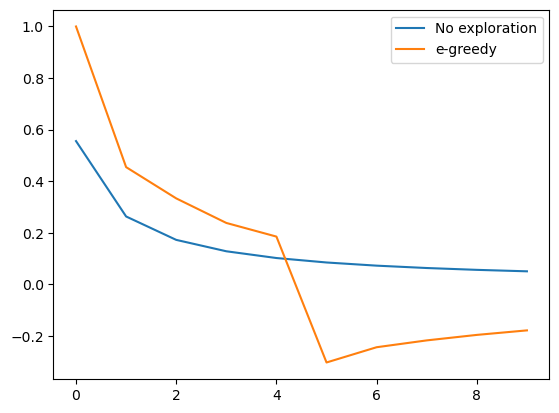

In [55]:
fig = plt.figure()
plt.plot(Data_plot1, label = "No exploration")
plt.plot(Data_plot2, label = "e-greedy")
plt.legend()
plt.show()